Accuracy: 0.9481
Precision: 0.9489
Recall: 0.9481
F1-measure: 0.9483


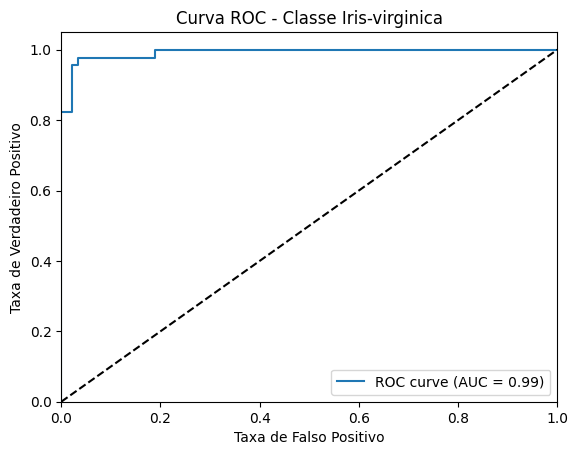

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Divisão do conjunto de dados Iris em treino e teste
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Treinamento do modelo de Regressão Logística
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train_std, y_train)

# Predição das classes no conjunto de teste
y_pred = model.predict(X_test_std)

# Avaliação do modelo usando as métricas implementadas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-measure: {f1:.4f}")

# Treinar o modelo de regressão logística para cada classe individualmente
models = []
for class_label in np.unique(y):
    binary_y_train = np.where(y_train == class_label, 1, 0)
    model = LogisticRegression()
    model.fit(X_train, binary_y_train)
    models.append(model)

# Calcular a curva ROC e a métrica AUC para a classe Iris-virginica (classe 2)
class_index = 2
binary_y_test = np.where(y_test == class_index, 1, 0)
y_scores = models[class_index].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(binary_y_test, y_scores)
auc = roc_auc_score(binary_y_test, y_scores)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Classe Iris-virginica')
plt.legend(loc="lower right")
plt.show()
